In [43]:
# Librerías básicas
import pandas as pd
import numpy as np

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.impute import SimpleImputer





# EDA

In [44]:
df = pd.read_csv("Datos.csv")
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [46]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [47]:
median_delay = df['Arrival Delay in Minutes'].median()
df['Arrival Delay in Minutes'].fillna(median_delay, inplace=True)

In [48]:
df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [49]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.133392
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.649776
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [50]:
df["Arrival Delay in Minutes"].value_counts()

0.0      58469
1.0       2211
2.0       2064
3.0       1952
4.0       1907
         ...  
458.0        1
729.0        1
382.0        1
459.0        1
369.0        1
Name: Arrival Delay in Minutes, Length: 455, dtype: int64

In [51]:
porcentaje_satisfaccion = df['satisfaction'].value_counts(normalize=True) * 100
porcentaje_satisfaccion

neutral or dissatisfied    56.666731
satisfied                  43.333269
Name: satisfaction, dtype: float64

In [52]:
# Selección de variables numéricas
variables_numericas = df.select_dtypes(include=['number'])  # Esto incluirá todas las columnas numéricas

# Selección de variables categóricas
variables_categoricas = df.select_dtypes(include=['object'])  # Esto incluirá todas las columnas de tipo 'object'

In [53]:
variables_numericas

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0
103900,103900,73097,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0
103901,103901,68825,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0
103902,103902,54173,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0


In [54]:
variables_categoricas 

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied
...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103900,Male,Loyal Customer,Business travel,Business,satisfied
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied


In [55]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

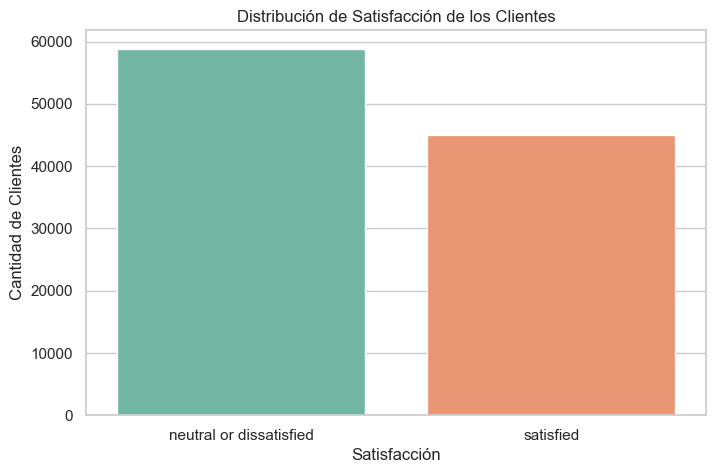

In [56]:

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Utiliza Seaborn para crear un gráfico de barras de la satisfacción
sns.countplot(x="satisfaction", data=df, palette="Set2")

plt.title("Distribución de Satisfacción de los Clientes")
plt.xlabel("Satisfacción")
plt.ylabel("Cantidad de Clientes")

# Muestra el gráfico
plt.show()

# Transformación de datos


In [57]:
print(df['Arrival Delay in Minutes'].isnull().sum())

0


In [58]:
# Inicializar el imputador con la estrategia de la media
imputer = SimpleImputer(strategy='mean')

In [59]:
# Aplicar la imputación a la columna Arrival Delay in Minutes
df['Arrival Delay in Minutes'] = imputer.fit_transform(df[['Arrival Delay in Minutes']])

In [60]:
# Define un diccionario de mapeo para género
gender_mapping = {"Female": 0, "Male": 1}

# Modelado

In [61]:
# Codificación one-hot de las columnas categóricas
df_encoded = pd.get_dummies(df, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'])

In [62]:
'''df_encoded = df_encoded.drop("Unnamed: 0", axis= 1)
df_encoded = df_encoded.drop("id", axis= 1)'''

'df_encoded = df_encoded.drop("Unnamed: 0", axis= 1)\ndf_encoded = df_encoded.drop("id", axis= 1)'

In [63]:
# Codificar la variable objetivo 'satisfaction'
df_encoded['satisfaction'] = df_encoded['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

# Separar características y variable objetivo
X = df_encoded.drop(columns=['satisfaction'])
y = df_encoded['satisfaction']

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
'''# Realizar predicciones
y_pred = model.predict(X_test)'''

'# Realizar predicciones\ny_pred = model.predict(X_test)'

In [66]:
'''# Evaluar el modelo
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix'''

'# Evaluar el modelo\nfrom sklearn.metrics import accuracy_score, classification_report, confusion_matrix'

In [67]:
'''# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)'''

'# Calcular la precisión del modelo\naccuracy = accuracy_score(y_test, y_pred)\nprint("Accuracy:", accuracy)'

In [68]:
'''# Mostrar el informe de clasificación
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)'''

'# Mostrar el informe de clasificación\nreport = classification_report(y_test, y_pred)\nprint("Classification Report:\n", report)'

In [69]:
'''# Mostrar la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)'''

'# Mostrar la matriz de confusión\nconfusion = confusion_matrix(y_test, y_pred)\nprint("Confusion Matrix:\n", confusion)'

In [70]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo en los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = rf_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

# Imprimir el informe de clasificación y la matriz de confusión
print("Informe de Clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))


Precisión del modelo: 0.96
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.97      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781

Matriz de Confusión:
[[11492   221]
 [  534  8534]]


# Random Forest

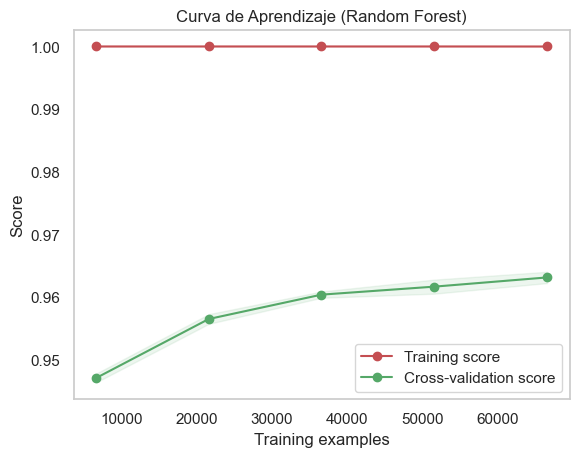

In [73]:
# Crea un modelo de Random Forest
#model = RandomForestClassifier(n_estimators=100, random_state=42)

# Genera y muestra la curva de aprendizaje
plot_learning_curve(rf_model, "Curva de Aprendizaje (Random Forest)", X_train, y_train, cv=5)
plt.show()

In [74]:
X = df_encoded.drop(columns=['satisfaction'])  # Características
y = df_encoded['satisfaction']  # Variable objetivo

In [75]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:

# Crear el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [86]:
# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir los resultados
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 0.9637
Precision: 0.9748
Recall: 0.9411
F1-Score: 0.9576


In [80]:

# Calcular la precisión del modelo
#accuracy = accuracy_score(y_test, y_pred)
#print("Precisión del modelo:", accuracy)

# Imprimir el informe de clasificación
#print(classification_report(y_test, y_pred))

# Imprimir la matriz de confusión
#confusion = confusion_matrix(y_test, y_pred)
#print("Matriz de Confusión:")
#print(confusion)

In [79]:
from sklearn.metrics import accuracy_score

# Predecir etiquetas en el conjunto de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular la precisión en el conjunto de entrenamiento y prueba
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calcular la diferencia entre el rendimiento en el conjunto de entrenamiento y prueba
overfitting = train_accuracy - test_accuracy

print("Precisión en entrenamiento:", train_accuracy)
print("Precisión en prueba:", test_accuracy)
print("Diferencia (Overfitting):", overfitting)

Precisión en entrenamiento: 0.9999879696353596
Precisión en prueba: 0.9636687358644916
Diferencia (Overfitting): 0.03631923377086799


In [ ]:
# Comprobar si el sobreajuste es inferior al 5%
if overfitting < 0.05:
    print("El modelo tiene un sobreajuste inferior al 5%.")
else:
    print("El modelo podría estar mostrando un sobreajuste significativo.")

El modelo tiene un sobreajuste inferior al 5%.


c:\Users\monte\Airline\Airline\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\monte\Airline\Airline\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\monte\Airline\Airline\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


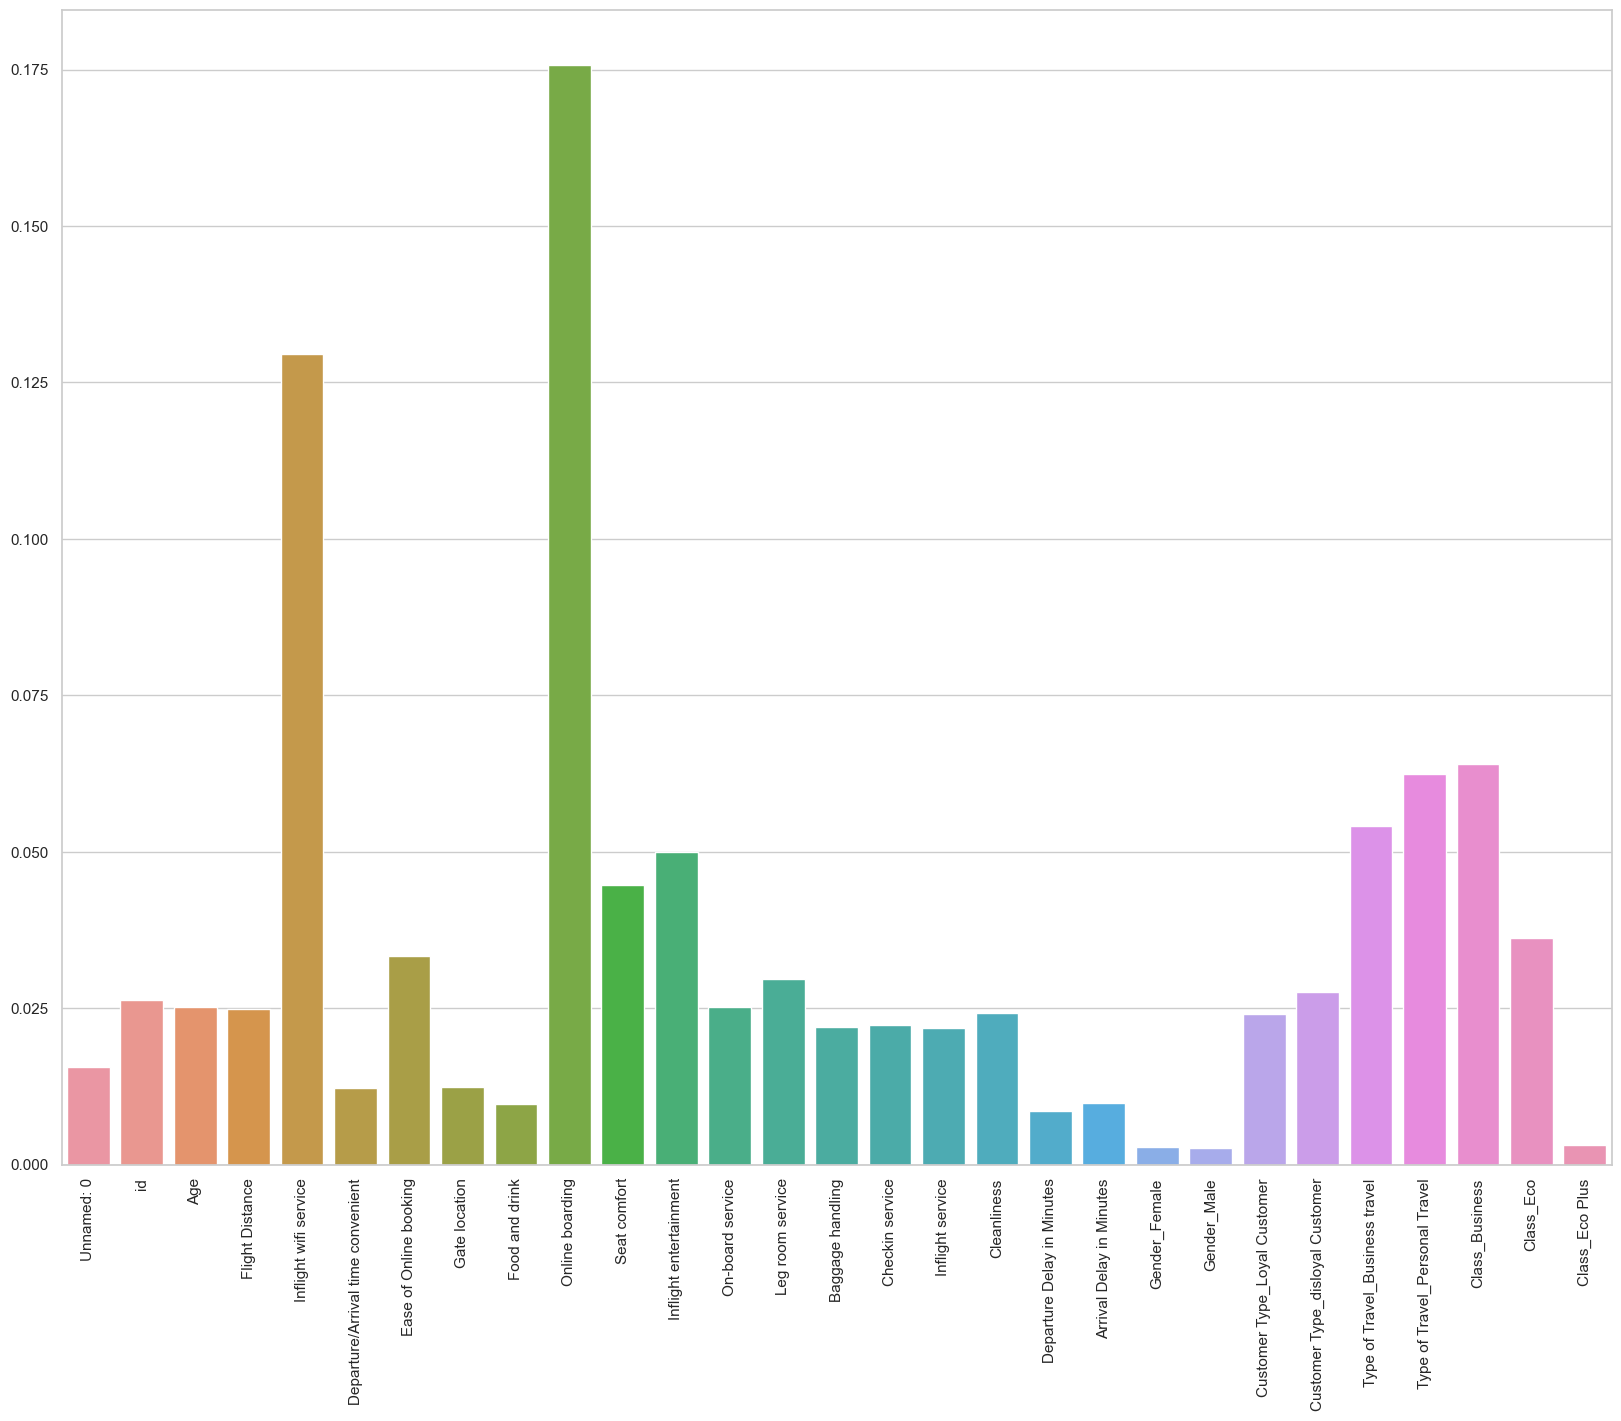

In [ ]:
# Obtener las importancias de características del modelo de Random Forest
importances = model.feature_importances_

# Obtener los nombres de las características del conjunto de datos
names = X_train.columns  # Suponiendo que X_train es un DataFrame de pandas

# Crear el gráfico de barras
plt.figure(figsize=(20, 15))
plot = sns.barplot(x=names, y=importances)
plt.xticks(rotation=90)
plt.show()

# Validación cruzada

In [ ]:
# Configurar la validación cruzada estratificada con 5 pliegues (ajusta según tus necesidades)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Realizar la validación cruzada y obtener las puntuaciones de precisión
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

# Mostrar las puntuaciones de precisión en cada pliegue
print("Precisión en cada pliegue:", scores)

# Calcular y mostrar la precisión media y la desviación estándar
print("Precisión media:", np.mean(scores))
print("Desviación estándar de la precisión:", np.std(scores))

Precisión en cada pliegue: [0.96482364 0.96188826 0.96501612 0.96414994 0.96256015]
Precisión media: 0.9636876238886867
Desviación estándar de la precisión: 0.0012472414595103866


In [ ]:
import pickle

In [ ]:
ruta_modelo_pickle = 'modelo_entrenado_alexa.pkl'
with open(ruta_modelo_pickle, 'wb') as archivo_pickle:
    pickle.dump(model, archivo_pickle)

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Crear un modelo base (árbol de decisión)
base_model = DecisionTreeClassifier()

# Crear un ensemble de Bagging con 100 modelos base
ensemble_model = BaggingClassifier(base_model, n_estimators=100)

# Entrenar el ensemble en tus datos de entrenamiento
ensemble_model.fit(X_train, y_train)

# Evaluar el rendimiento del ensemble en los datos de prueba
accuracy = ensemble_model.score(X_test, y_test)

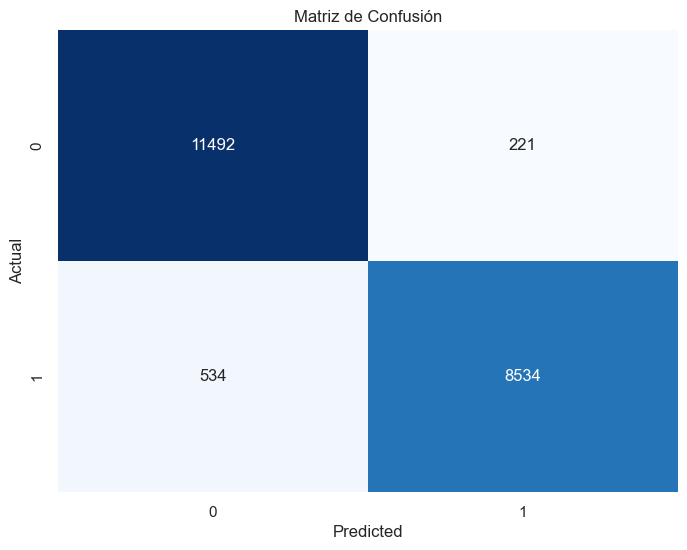

In [ ]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusión")
plt.show() 

In [ ]:
# Crear un gráfico de barras para la relación entre edad y satisfacción
plt.figure(figsize=(12, 6))  # Tamaño de la figura


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

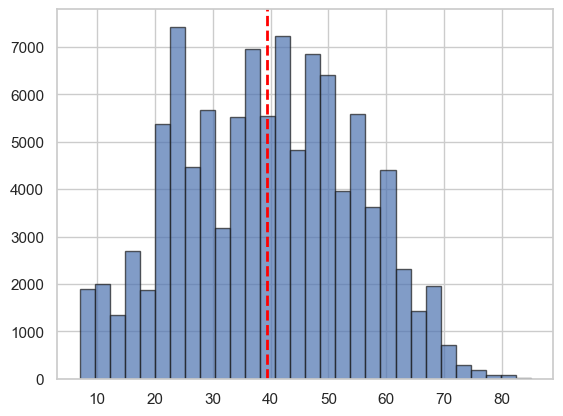

In [ ]:
# Crear un histograma de edades
plt.hist(df['Age'], bins=30, edgecolor='k', alpha=0.7)

# Calcular la edad promedio
edad_promedio = df['Age'].mean()

# Agregar una línea vertical para mostrar la edad promedio
plt.axvline(edad_promedio, color='red', linestyle='dashed', linewidth=2, label=f'Edad Promedio: {round(edad_promedio, 2)} años')

(array([1202., 1375.,  678., 1268.,  707., 1717.,  984., 1882., 3027.,
        2351., 4624., 2798., 4475., 1707., 3962., 1607., 3421., 3676.,
        2319., 4637., 2969., 5030., 2457., 4797., 2339., 4538., 4535.,
        2077., 4167., 1904., 3728., 1858., 3625., 3487.,  906., 1604.,
         718., 1421.,  660., 1294.,  617.,  295.,   98.,   61.,  132.,
          33.,  120.,    0.,    0.,   17.]),
 array([ 7.  ,  8.56, 10.12, 11.68, 13.24, 14.8 , 16.36, 17.92, 19.48,
        21.04, 22.6 , 24.16, 25.72, 27.28, 28.84, 30.4 , 31.96, 33.52,
        35.08, 36.64, 38.2 , 39.76, 41.32, 42.88, 44.44, 46.  , 47.56,
        49.12, 50.68, 52.24, 53.8 , 55.36, 56.92, 58.48, 60.04, 61.6 ,
        63.16, 64.72, 66.28, 67.84, 69.4 , 70.96, 72.52, 74.08, 75.64,
        77.2 , 78.76, 80.32, 81.88, 83.44, 85.  ]),
 <BarContainer object of 50 artists>)

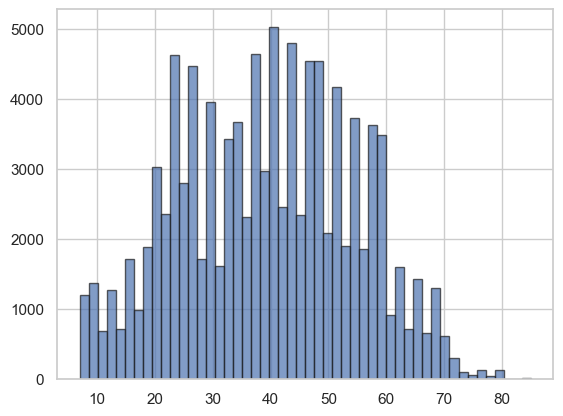

In [ ]:

# Crear un histograma de edades
plt.hist(df['Age'], bins=50, edgecolor='k', alpha=0.7)



C:\Users\monte\AppData\Local\Temp\ipykernel_16008\644465556.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_class_satisfaction = df.groupby(['Age Group', 'Class', 'satisfaction']).size().unstack(fill_value=0)


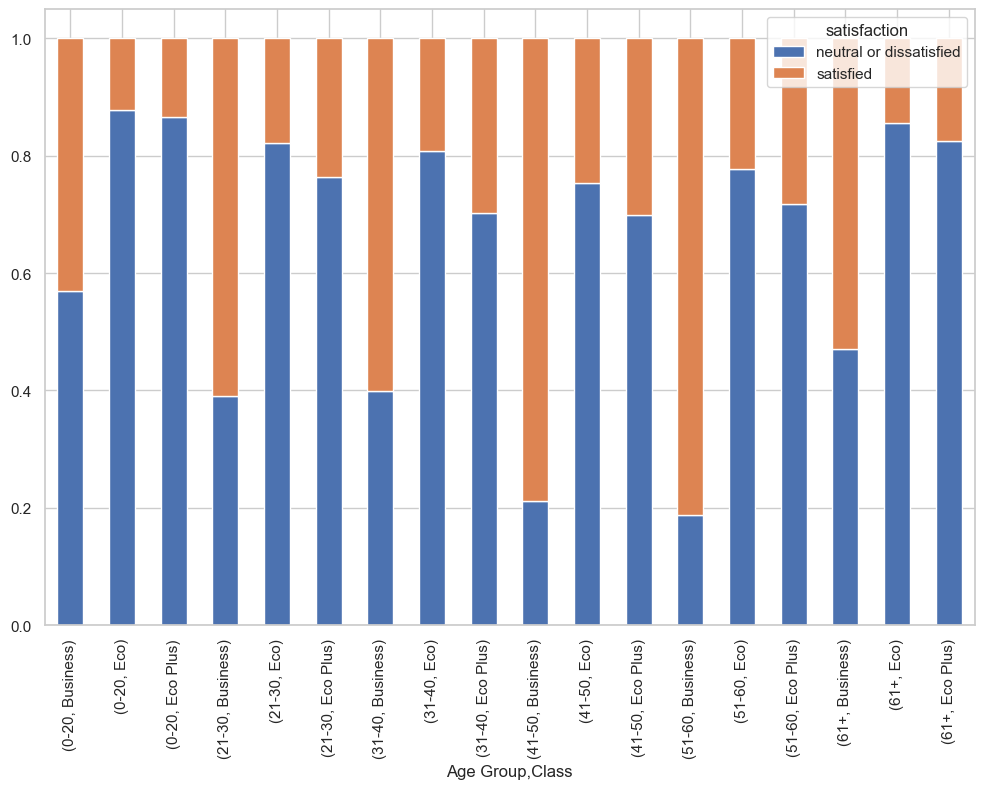

In [ ]:
# Crear la columna 'Age Group' en base a la edad
bins = [0, 20, 30, 40, 50, 60, float('inf')]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Crear el gráfico de barras apilado
age_class_satisfaction = df.groupby(['Age Group', 'Class', 'satisfaction']).size().unstack(fill_value=0)

# Normalizar los valores para obtener proporciones
age_class_satisfaction = age_class_satisfaction.div(age_class_satisfaction.sum(axis=1), axis=0)

# Crear el gráfico de barras apilado
ax = age_class_satisfaction.plot(kind='bar', stacked=True, figsize=(12, 8))


In [ ]:
print(np.isnan(y).sum())

103904


In [ ]:
#Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
gb_classifier = GradientBoostingClassifier(
    n_estimators=100,  # Número de árboles o estimadores a usar
    learning_rate=0.1,  # Tasa de aprendizaje
    max_depth=3  # Profundidad máxima de los árboles
)
